In [31]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import os
import warnings
import scipy as sc
import scipy.stats as scs
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import itertools
import math
from datetime import timedelta
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')
df = pd.read_csv('AnbonDYield.csv', encoding='latin1')

---

In [3]:
df.head(5)

,DATE,GBMT10UKA,LTCYUKA
0,1929-01-01,4.76,4.57
1,1930-01-01,4.31,4.45
2,1931-01-01,4.85,4.40
3,1932-01-01,3.67,3.75
4,1933-01-01,3.45,3.38


In [4]:
df['price'] = pd.to_numeric(df.LTCYUKA, errors='coerce')

In [5]:
df = df.drop('GBMT10UKA', axis = 1)

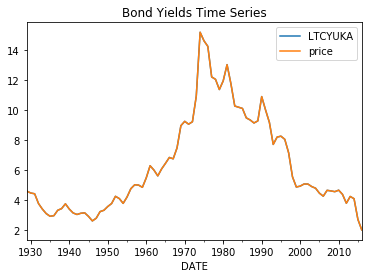

In [6]:
df.index = pd.to_datetime(df.DATE) #changing date into an index
#The reason you change the date into an index, the model is asking to submit one column
df.plot()
plt.title('Bond Yields Time Series')
plt.show()

In [7]:
df.drop(['LTCYUKA'], axis = 1, inplace = True)
df.sort_index(ascending = False)

,DATE,price
DATE,,
2016-01-01,2016-01-01,1.99
2015-01-01,2015-01-01,2.69
2014-01-01,2014-01-01,4.07
2013-01-01,2013-01-01,4.22
2012-01-01,2012-01-01,3.77
2011-01-01,2011-01-01,4.36
2010-01-01,2010-01-01,4.64
2009-01-01,2009-01-01,4.54
2008-01-01,2008-01-01,4.59


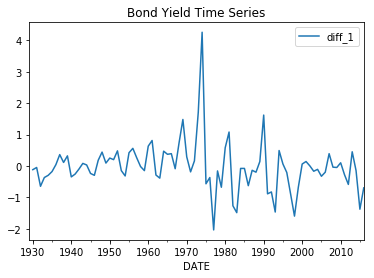

In [8]:
df['diff_1'] = df.price - df.price.shift() #yt-yt-1 
df.plot(y='diff_1')
plt.title('Bond Yield Time Series')
plt.show()

Text(0.5, 1.0, 'Bond Yield PACF')

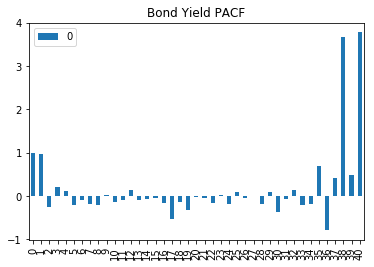

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df.price))
x_acf.plot(kind='bar')
plt.title("Bond Yield PACF")

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.price, order=(0,1,0)) #integration of 1 and you're taking the 1st difference
                                            #0 (AR) zero and (MA) zero (surrounding the 1)
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   87
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -101.881
Method:                           css   S.D. of innovations              0.780
Date:                Sat, 10 Aug 2019   AIC                            207.762
Time:                        19:26:29   BIC                            212.694
Sample:                    01-01-1930   HQIC                           209.748
                         - 01-01-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0297      0.084     -0.354      0.724      -0.194       0.134
Residuals Description
count    8.700000e+01
mean     2.319270e-09
std      7.849684e-01
min     -2.010345e+00
25%     -2.803448e-01

C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [11]:
model = ARIMA(df.price, order=(1,1,0)) #integration of 1 and you're taking the 1st difference
                                            #0 (AR) zero and (MA) zero (surrounding the 1)
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   87
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -98.733
Method:                       css-mle   S.D. of innovations              0.752
Date:                Sat, 10 Aug 2019   AIC                            203.466
Time:                        19:26:29   BIC                            210.864
Sample:                    01-01-1930   HQIC                           206.445
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0328      0.109     -0.300      0.765      -0.247       0.181
ar.L1.D.price     0.2638      0.103      2.558      0.012       0.062       0.466
                                    Root

C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [12]:
model = ARIMA(df.price, order=(1,1,1)) #integration of 1 and you're taking the 1st difference
                                            #0 (AR) zero and (MA) zero (surrounding the 1)
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   87
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -98.330
Method:                       css-mle   S.D. of innovations              0.749
Date:                Sat, 10 Aug 2019   AIC                            204.660
Time:                        19:26:30   BIC                            214.524
Sample:                    01-01-1930   HQIC                           208.632
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0315      0.105     -0.299      0.766      -0.238       0.175
ar.L1.D.price     0.0788      0.243      0.324      0.747      -0.398       0.556
ma.L1.D.price     0.2109      0.224     

C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\liuth\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [13]:
df.Timestamp = pd.to_datetime(df['DATE'], format='%Y/%m/%d')
df.index = df.Timestamp
df = df.sort_index(ascending=True)

C:\Users\liuth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [14]:
df.drop(['diff_1', 'DATE'], axis = 1 , inplace = True)

In [15]:
df

,price
DATE,
1929-01-01,4.57
1930-01-01,4.45
1931-01-01,4.40
1932-01-01,3.75
1933-01-01,3.38
1934-01-01,3.08
1935-01-01,2.90
1936-01-01,2.94
1937-01-01,3.30


In [29]:
yt = df
split = int(yt.shape[0]*0.7)
yt = df['price']
y_truth = yt[split:]
yt.shape


p=q=range(0,2)
d=range(0,2)

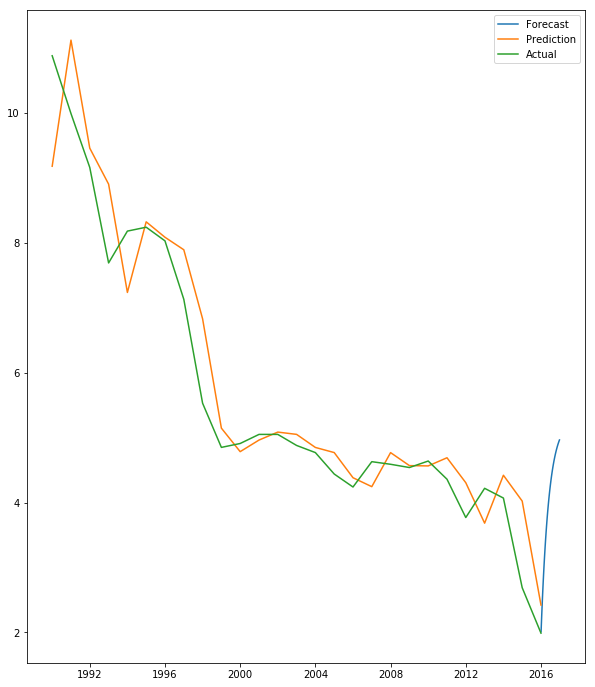

In [32]:
        AIC_list_arima = pd.DataFrame({}, columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
        pdq = list(itertools.product(p,d,q))
        nstep = 52
        for param in pdq:
            #try:
                mod = ARIMA(yt, order=param)
                results = mod.fit(disp=0)
                pred_arma = results.predict(start=split, dynamic=False)
                rmse_arma = math.sqrt(((pred_arma - yt) ** 2).mean())
                forecast = results.forecast(steps=nstep)[0]
                temp = pd.DataFrame([[param, results.aic, np.array(pred_arma), np.array(y_truth), rmse_arma, forecast]],
                                    columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
                AIC_list_arima = AIC_list_arima.append(temp, ignore_index=True)  # DataFrame append

                del temp
        index = int(AIC_list_arima[['rmse']].idxmin())
        pred = AIC_list_arima.loc[[index], ['Pred']]
        y_tr = AIC_list_arima.loc[[index], ['y_truth']]
        forecast = AIC_list_arima.loc[[index], ['forecast']]
        date_rng = pd.date_range(start=y_truth.index[-1] + timedelta(1), end=y_truth.index[-1] + timedelta(nstep * 7),
                                 freq='W')

        y_tr = np.array(y_tr)[0][0]
        pred = np.array(pred)[0][0]
        forecast = np.array(forecast)[0][0]
        plt.figure(figsize=(10, 12))
        
        plt.plot(date_rng, forecast, label='Forecast')
        plt.plot(y_truth.index, pred, label='Prediction')
        plt.plot(y_truth.index, y_tr, label='Actual')
        plt.legend()
        plt.show()

In [36]:
AIC_list_arima['forecast']

0    [6.296363636363635, 6.296363636363635, 6.29636...
1    [4.266705857480384, 6.267329766324094, 6.26732...
2    [1.960344825266937, 1.9306896505338742, 1.9010...
3    [1.871015848908425, 1.839956074174504, 1.80889...
4    [2.081426401657815, 2.1700963625900513, 2.2560...
5    [2.012073472999138, 2.1573068098450707, 2.2961...
6    [1.781220212288784, 1.7020242736115496, 1.6570...
7    [1.8441141905680296, 1.8036188490684664, 1.771...
Name: forecast, dtype: object

---

This section doesn't work properly I need to revisit this

In [25]:
#Lets revisit this in the future to fix the function and make it work
#def arima(yt,p,d,q, plot_result):
        AIC_list_arima = pd.DataFrame({}, columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
        #y_truth = yt[split:]
        pdq = list(itertools.product(p,d,q))
        nstep = 52
        for param in pdq:
            #try:
                mod = ARIMA(yt, order=param)
                results = mod.fit(disp=0)
                pred_arma = results.predict(start=split, dynamic=False)
                rmse_arma = math.sqrt(((pred_arma - y_truth) ** 2).mean())
                forecast = results.forecast(steps=nstep)[0]
                temp = pd.DataFrame([[param, results.aic, np.array(pred_arma), np.array(y_truth), rmse_arma, forecast]],
                                    columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
                AIC_list_arima = AIC_list_arima.append(temp, ignore_index=True)  # DataFrame append

                del temp
        index = int(AIC_list_arima[['rmse']].idxmin())
        pred = AIC_list_arima.loc[[index], ['Pred']]
        y_tr = AIC_list_arima.loc[[index], ['y_truth']]
        forecast = AIC_list_arima.loc[[index], ['forecast']]
        date_rng = pd.date_range(start=y_truth.index[-1] + timedelta(1), end=y_truth.index[-1] + timedelta(nstep * 7),
                                 freq='W')

        y_tr = np.array(y_tr)[0][0]
        pred = np.array(pred)[0][0]
        forecast = np.array(forecast)[0][0]
        plt.figure(figsize=(10, 12))
        #if plot_result:
        plt.plot(date_rng, forecast, label='Forecast')
        plt.plot(y_truth.index, pred, label='Prediction')
        plt.plot(y_truth.index, y_tr, label='Actual')
        plt.legend()
        plt.show()
        """
                        First param. returns RMSE,
                        Second param Return Forecast Values
                """
        #return AIC_list_arima.loc[[index], ['rmse']].values[0][0], forecast, date_rng,AIC_list_arima.loc[[index], ['pram']]

IndentationError: unexpected indent (<ipython-input-25-f9f3997660ce>, line 2)

In [23]:
AIC_list_arima

,pram,AIC,Pred,y_truth,rmse,forecast


In [18]:
AIC_list_arima = pd.DataFrame({}, columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])    
        #pdq = list(itertools.product(p,d,q))
nstep = 52
        #for param in pdq:
            #try:
mod = arima(yt, 1,1,2, 0)
results = mod.fit(disp=0)
pred_arma = results.predict(start=split, dynamic=False)
rmse_arma = math.sqrt(((pred_arma - y_truth) ** 2).mean())
forecast = results.forecast(steps=nstep)[0]
temp = pd.DataFrame([[param, results.aic, np.array(pred_arma), np.array(y_truth), rmse_arma, forecast]],
                      columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
AIC_list_arima = AIC_list_arima.append(temp, ignore_index=True)  # DataFrame append

del temp
                # results.plot_predict(start=len(y_truth), end= len(yt)+10, dynamic=False)

           # except:
                #continue
index = int(AIC_list_arima[['rmse']].idxmin())

TypeError: 'int' object is not iterable

In [19]:
def sarima(yt, p, d, q, plot_result=0):
    """ Seasonally Autoregressive Integrated Moving Average """
    # Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

    # STEP
    nstep = 12
    y_truth = yt[split:]
    AIC_list_sarima = pd.DataFrame({}, columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(yt,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(disp=0)

            pred = results.get_prediction(start=split, dynamic=False)
            prediction = pred.predicted_mean
            fore = results.get_forecast(steps=nstep)
            forecast = fore.predicted_mean
            rmse_sarima = math.sqrt(((prediction - y_truth) ** 2).mean())

            temp = pd.DataFrame(
                [[param, results.aic, np.array(prediction), np.array(y_truth), rmse_sarima, forecast]],
                columns=['pram', 'AIC', 'Pred', 'y_truth', 'rmse', 'forecast'])
            AIC_list_sarima = AIC_list_sarima.append(temp, ignore_index=True)  # DataFrame append

    index = int(AIC_list_sarima[['rmse']].idxmin())
    pred = AIC_list_sarima.loc[[index], ['Pred']]
    y_tr = AIC_list_sarima.loc[[index], ['y_truth']]
    forecast = AIC_list_sarima.loc[[index], ['forecast']]
    #date_rng = pd.date_range(start=y_truth.index[-1], end=y_truth.index[-1] + timedelta(nstep * 7),
    #                         freq='W')
    #date_rng = pd.date_range(periods=7, start=y_truth.index[-1], freq='M')[1:]
    date_rng = pd.date_range(start=y_truth.index[-1] + timedelta(1), end=y_truth.index[-1] + timedelta(nstep * 7),
                                 freq='W')
    y_tr = np.array(y_tr)[0][0]
    pred = np.array(pred)[0][0]
    forecast = np.array(forecast)[0][0]
    if plot_result:
        plt.figure(figsize=(12, 5))
        plt.plot(yt.index, yt, label='Train')
        plt.plot(date_rng, forecast, label='Forecast')
        #plt.plot(y_truth.index, pred, label='Prediction')
        plt.plot(y_truth.index, y_tr, label='Actual')
        plt.legend()
        plt.show()

    #print("SARIMA->", AIC_list_sarima.loc[[index], ['rmse']])
    """
            First param. returns RMSE,
            Second param Return Forecast Values
    """
    return AIC_list_sarima.loc[[index],['rmse']], forecast, date_rng

In [20]:
AIC_list_sarima

NameError: name 'AIC_list_sarima' is not defined

End of section

---